# Color-based segmentation with OpenCV and Python

On how to perform color-based segmentation.


(c) Manuel Jesús Marín-Jiménez / Universidad de Córdoba



In [1]:
# Descargamos una imagen de prueba
# url = "https://estaticos.muynegociosyeconomia.es/media/cache/1140x_thumb/uploads/images/gallery/5eb93bd35bafe8865ffe7f39/thesimpsons_0.jpg"
# url = "https://i.blogs.es/fd032a/campos-girasoles-ruta/1366_2000.jpg"
url = "https://m.media-amazon.com/images/I/61iDHXHXFAL._AC_SX466_.jpg"

!wget {url} -O testimage.jpg

--2021-11-10 09:05:24--  https://m.media-amazon.com/images/I/61iDHXHXFAL._AC_SX466_.jpg
Resolving m.media-amazon.com (m.media-amazon.com)... 13.226.41.45, 2a04:4e42::272, 2a04:4e42:200::272, ...
Connecting to m.media-amazon.com (m.media-amazon.com)|13.226.41.45|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 28468 (28K) [image/jpeg]
Saving to: ‘testimage.jpg’

testimage.jpg       100%[===================>]  27.80K  --.-KB/s    in 0.006s  

2021-11-10 09:05:24 (4.32 MB/s) - ‘testimage.jpg’ saved [28468/28468]



In [2]:
# Comprobamos que hemos descargado la imagen
!ls /content/*.jpg

/content/testimage.jpg


In [3]:
# Importamos las bibliotecas básicas para trabajar en los siguientes ejemplos
import cv2
from google.colab.patches import cv2_imshow  # Esto es un parche que solo nos sirve para Google Colab
import numpy as np  # Suele ser útil

uint8
(390, 466, 3)



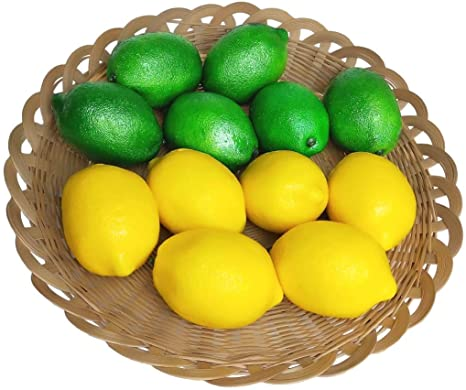

In [4]:
# Mostramos la imagen cargada
path = "/content/testimage.jpg"

# Leemos la imagen de disco
img = cv2.imread(path)  # Esto nos devuelve una matriz 'numpy'

# Algunos datos sobre la variable que contiene una imagen
print(img.dtype)  # Tipo de dato de la imagen
print(img.shape)  # Dimensiones de la imagen: atributo shape
print("==========================================================================\n")

# Visualizamos la imagen
cv2_imshow(img)

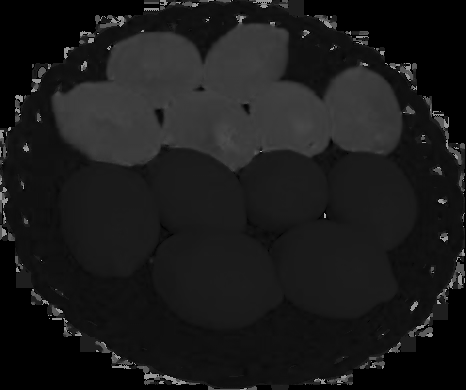

In [5]:
# Convert image to HSV
hsv_img = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
cv2_imshow(hsv_img[:,:,0])   # Visualizamos el resultado

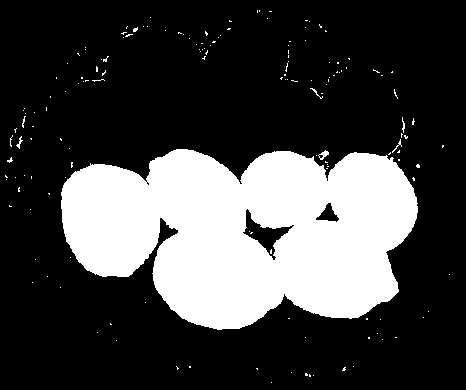

In [6]:
# Define target color
yellow_li = (20, 100, 100) 
yellow_da = (30, 255, 255) 
mask = cv2.inRange(hsv_img, yellow_li, yellow_da)

cv2_imshow(mask)

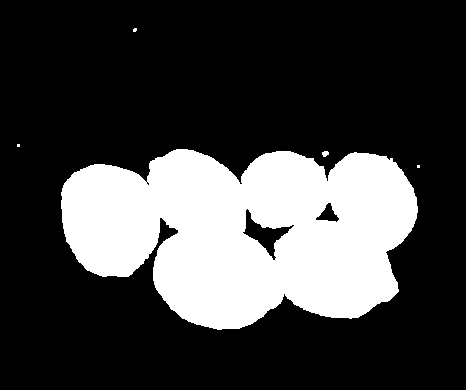

In [7]:
# erode+dilate for noise reduction
if True:
  # kernel = np.ones((5,5), np.uint8)
  kernel = np.ones((3,3), np.uint8)

  img_erosion = cv2.erode(mask, kernel, iterations=1)
  mask = cv2.dilate(img_erosion, kernel, iterations=1)

  cv2_imshow(mask)

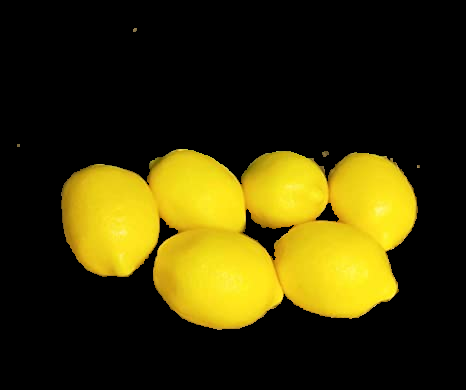

In [8]:
# Apply mask
segmented = cv2.bitwise_and(img, img, mask=mask)

cv2_imshow(segmented)

In [9]:
# Guardamos la imagen resultante
imgout = segmented.astype(np.uint8)  # Como brillante tiene valores [0,1], lo pasamos a [0,255] y convertimos el tipo de dato a '8bits'

cv2.imwrite("/content/segmentation.png", imgout)

# Comprobamos que se ha guardado
!ls /content

sample_data  segmentation.png  testimage.jpg
